# SEAGLE Forward Model 

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy.io
import scipy as scipy
import SEAGLE as seagle
import time

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# %load_ext autoreload
# %reload_ext autoreload

tf.reset_default_graph()

# Lets define the SEAGLE forward model according to the formula in the paper

Basically we want to invert the Lippmann Schwinger equation:

     
$$u(x) = u_{in}+\int_{-\infty}^{\infty} g(x-x^´) f(x^´) u(x^´) \, dx^´$$



Which is equal to a convolution with the Greensfunction with the scattering potential. The Greensfunction in 3D is 
$$ g(x) = \frac{exp(j k_b ||x||^2)}{4\pi||x||^2)} $$ 

where $k_b=\frac{2\pi}{\lambda_0}\sqrt{n_{embb}}$ is the wavenumber in the background medium.


It further reduces to:
$$u(x) = u_{in}+u_{scat}$$

where
$$u_{scat}=\int_{-\infty}^{\infty} g(x-x^´) f(x^´) u(x^´) \, dx^´$$


We can now write the above equation as:


$$u(x) = u_{in}+{F}^{-1}\{{F}\{G\}\times {F}\{f\times u\}\}$$
where $$F\{\},F^{-1}\{\}$$ denote the 3D Fourier- and inverse 3D Fourier-transform respectively. 
We now assume, that the input field $u_{in}$ is known and try to minimize the following problem with respect to $u$:

$$min_{\rightarrow u} \left( u(x) - u_{in} - {F}^{-1}\{{F}\{G\}\times {F}\{f\times u\}\}\right)$$


As an object $f(x)$ we insert the 3D refractive index distribution as follows:

$$f(x) = k^2(n_{obj}(x)-n_{embbb})$$
which is assumed to be real, where the wavenumber in vacuum is given by $k=\frac{2 \pi }{\lambda_0}$.

# Define experimental Parameters

In [15]:
#%---------------------------------------------------------------------
#                  START CODE HERE                                    #
#%---------------------------------------------------------------------
       
# Define some parameters
is_debug = True # do you want to display everything?
learningrate = .1 
Niter = 100 # Optimization Steps

mysize = (100, 100, 100) # Z X Y
mymidpoint = int(mysize[1]/2)
mysample = np.zeros(mysize)

nObj = 1.4
nEmbb = 1.33
#nObj = 1.52 + 0.0 * 1j;
Boundary=9;

lambda0 = .5; # measured in µm
pixelsize = lambda0/4


# generate Sample, Assume nObj everywhere where mysample is 1, rest is background 
mysample = seagle.insertSphere((mysample.shape[0], mysample.shape[1], mysample.shape[2]), obj_dim=0.1, obj_type=0, diameter=1, dn=1) 

# define the source and insert it in the volume
kx = 0
ky = 0
myWidth = 20;
mySrc = seagle.insertSrc(mysize, myWidth, myOff=(Boundary+1, 0, 0), kx=kx,ky=ky);

# Initialize the SEAGLE model

Now computing Greens function and its fourier transformed
# What is the correct factor and why?


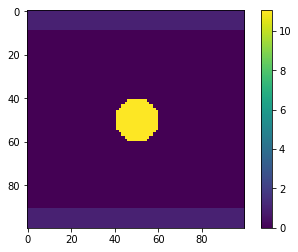

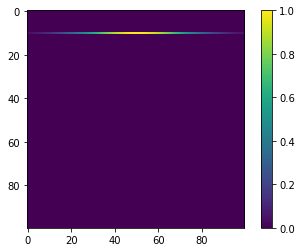

Initialize the SEAGLE System
Define Cost-Function 


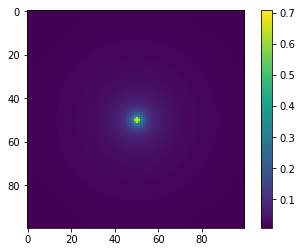

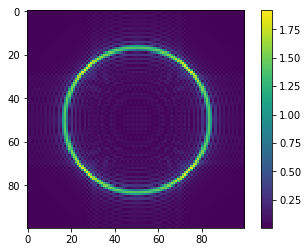

Define Optimizer
Init operands 
run init


In [16]:
#%-----------------------------------------------------------------------------
#                  SEAGLE PART COMES  HERE                                    #
#%-----------------------------------------------------------------------------

# Instantiate the SEAGLE
MySEAGLE = seagle.SEAGLE(mysample, mySrc, lambda0=lambda0, pixelsize=pixelsize, nObj = nObj, nEmbb=nEmbb, Boundary=Boundary)

if(is_debug):
    # displaying the Src and Obj just for debugging purposes
    plt.imshow(np.squeeze(np.real(MySEAGLE.f[:,:,np.int(np.floor(mysize[2]/2))]))), plt.colorbar(), plt.show()
    plt.imshow(np.squeeze(np.real(MySEAGLE.mySrc[:,:,np.int(np.floor(mysize[2]/2))]))), plt.colorbar(), plt.show()
    
    scipy.io.savemat('myobj.mat', mdict={'myobj': MySEAGLE.f})
    scipy.io.savemat('myrsc.mat', mdict={'mySrc': MySEAGLE.mySrc})



# Compute the model inside the convergent born series 
MySEAGLE.computeModel()

if(is_debug):
    # Visualize Greenzs function
    plt.imshow(np.abs(MySEAGLE.greens_fkt[:,:,mymidpoint])), plt.colorbar(), plt.show()
    plt.imshow(np.abs(MySEAGLE.greens_fkt_ft[:,:,mymidpoint])), plt.colorbar(), plt.show()


# Define Minimization step
MySEAGLE.minimize(learningrate)

# Initialize all operands
MySEAGLE.compileGraph()


# Start to compute the E-field by minimizing the error of Lippmann-Schwinger

Start Computing the result
Step 0 took 0.0 s and the error: 0.0001115493


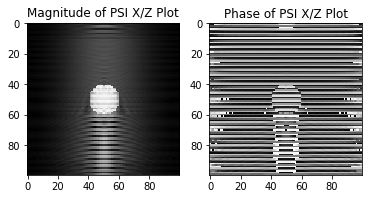

Step 1 took 0.0 s and the error: 0.0010053132


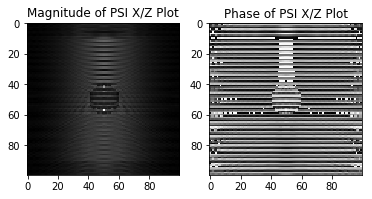

Step 2 took 0.0 s and the error: 6.169623e-05


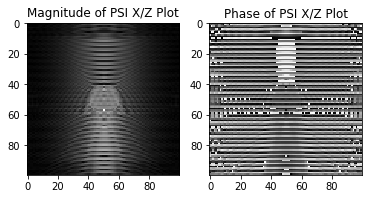

Step 3 took 0.0 s and the error: 0.00037357848


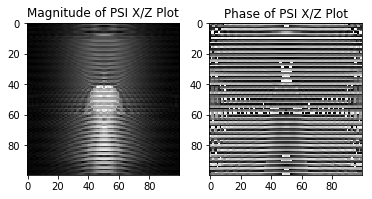

Step 4 took 0.0 s and the error: 0.00050351466


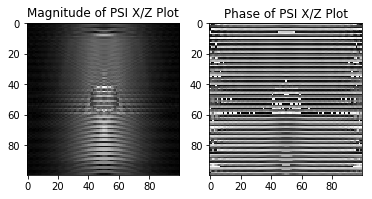

Step 5 took 0.0 s and the error: 0.0001443836


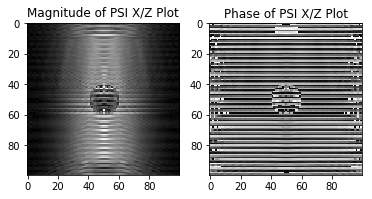

Step 6 took 0.0 s and the error: 4.7929072e-05


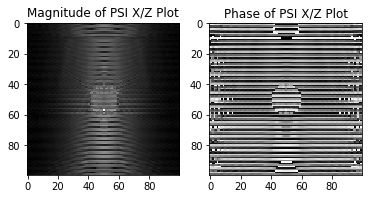

Step 7 took 0.0 s and the error: 0.0002490063


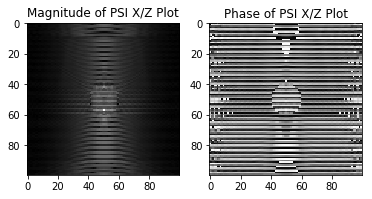

Step 8 took 0.0 s and the error: 0.00028609496


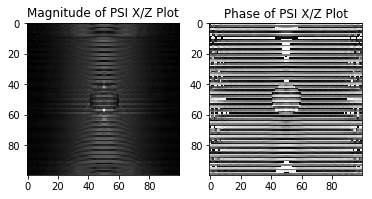

Step 9 took 0.0 s and the error: 0.00011216445


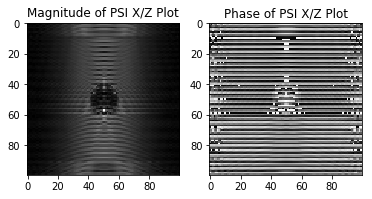

Step 10 took 0.0 s and the error: 2.0374e-05


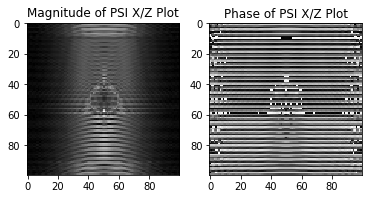

Step 11 took 0.0 s and the error: 0.00010741705


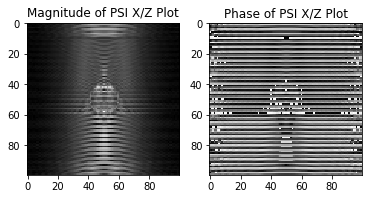

Step 12 took 0.0 s and the error: 0.00018351762


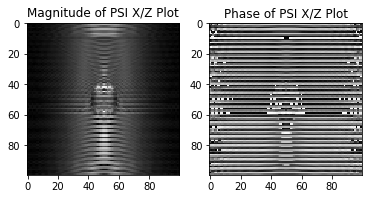

Step 13 took 0.0 s and the error: 0.000120723875


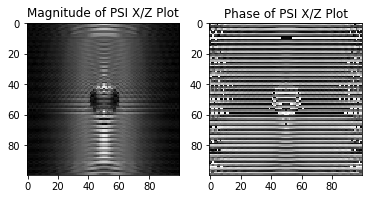

Step 14 took 0.0 s and the error: 2.6896192e-05


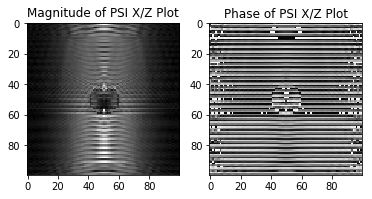

Step 15 took 0.0 s and the error: 2.9776913e-05


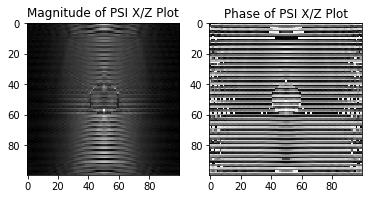

Step 16 took 0.0 s and the error: 9.385026e-05


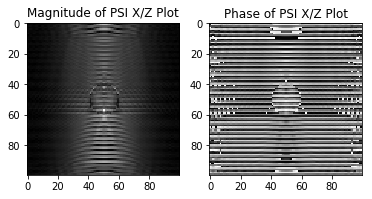

Step 17 took 0.0 s and the error: 0.00010423857


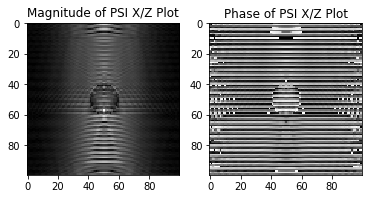

Step 18 took 0.0 s and the error: 4.8375496e-05


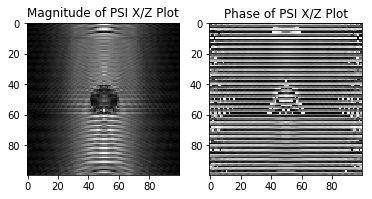

Step 19 took 0.0 s and the error: 1.0869642e-05


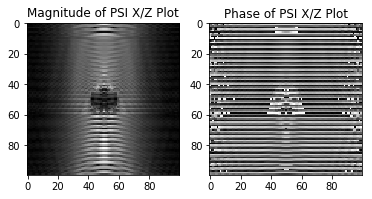

Step 20 took 0.0 s and the error: 3.3934746e-05


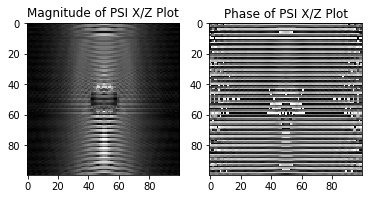

Step 21 took 0.0 s and the error: 6.618474e-05


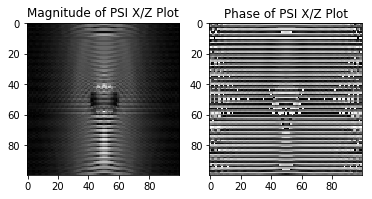

Step 22 took 0.0 s and the error: 5.3625274e-05


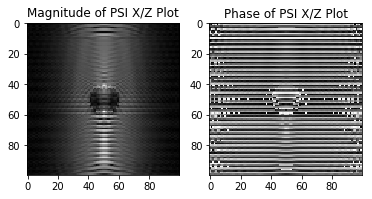

Step 23 took 0.0 s and the error: 1.7952336e-05


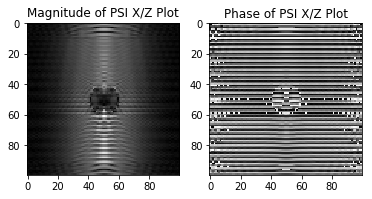

Step 24 took 0.0 s and the error: 9.94175e-06


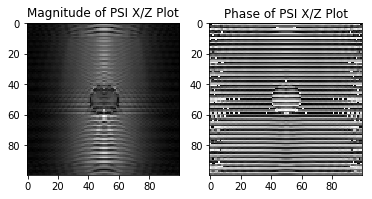

Step 25 took 0.0 s and the error: 3.139526e-05


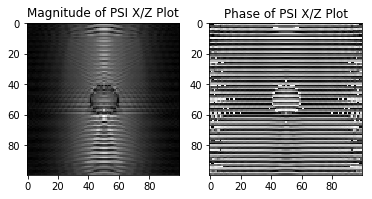

Step 26 took 0.0 s and the error: 4.155577e-05


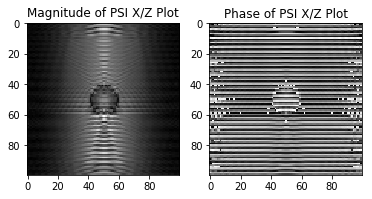

Step 27 took 0.0 s and the error: 2.4063804e-05


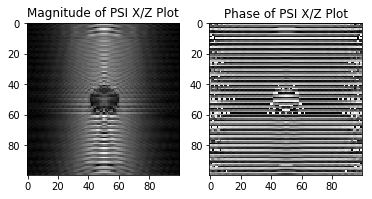

Step 28 took 0.0 s and the error: 6.465209e-06


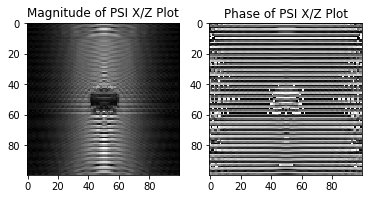

Step 29 took 0.0 s and the error: 1.1766676e-05


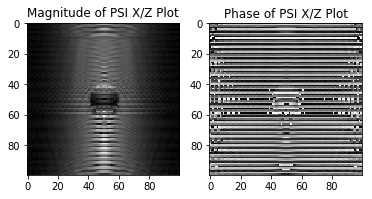

Step 30 took 0.0 s and the error: 2.5252162e-05


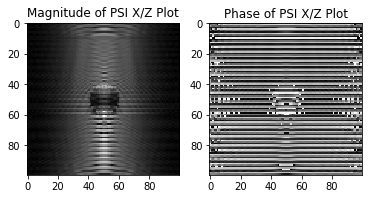

Step 31 took 0.0 s and the error: 2.2609673e-05


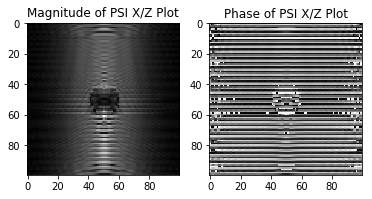

Step 32 took 0.0 s and the error: 8.293309e-06


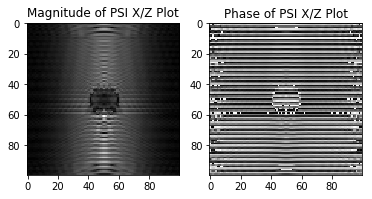

Step 33 took 0.0 s and the error: 4.1277235e-06


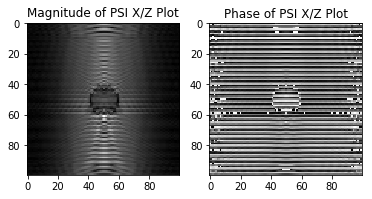

Step 34 took 0.0 s and the error: 1.3179914e-05


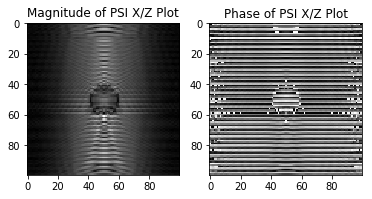

Step 35 took 0.0 s and the error: 1.7335144e-05


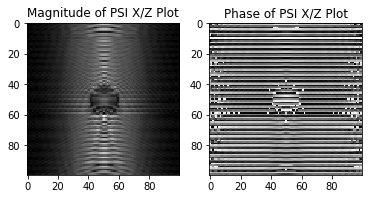

Step 36 took 0.0 s and the error: 8.90392e-06


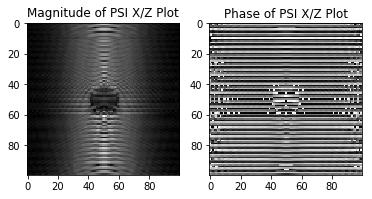

Step 37 took 0.0 s and the error: 1.978952e-06


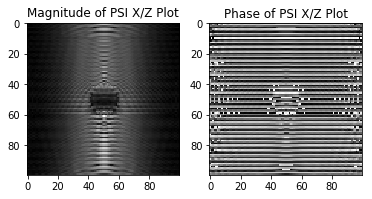

Step 38 took 0.0 s and the error: 6.463304e-06


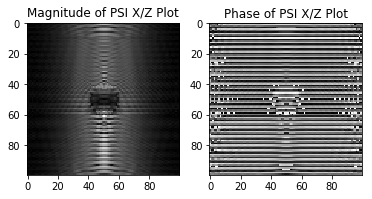

Step 39 took 0.0 s and the error: 1.1889102e-05


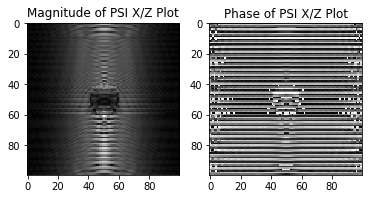

Step 40 took 0.0 s and the error: 7.729657e-06


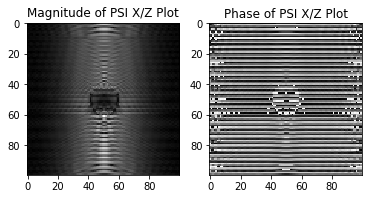

Step 41 took 0.0 s and the error: 1.5235013e-06


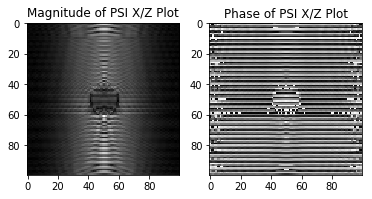

Step 42 took 0.0 s and the error: 3.3156082e-06


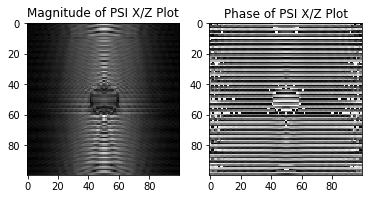

Step 43 took 0.0 s and the error: 7.797878e-06


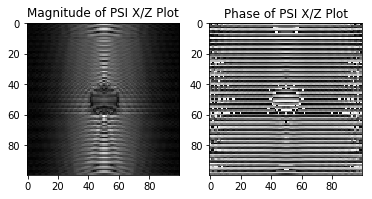

Step 44 took 0.0 s and the error: 5.891501e-06


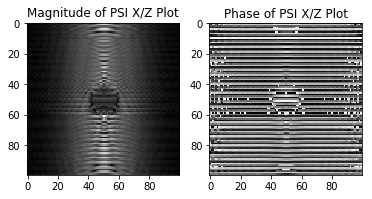

Step 45 took 0.0 s and the error: 1.3222799e-06


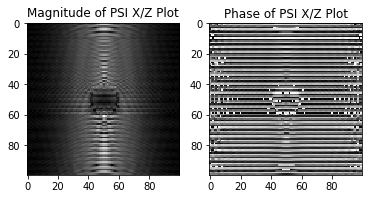

Step 46 took 0.0 s and the error: 1.950147e-06


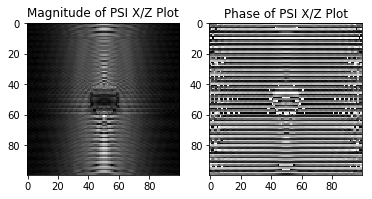

Step 47 took 0.0 s and the error: 5.1176935e-06


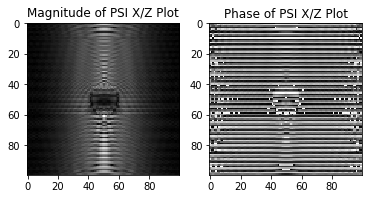

Step 48 took 0.0 s and the error: 4.1482776e-06


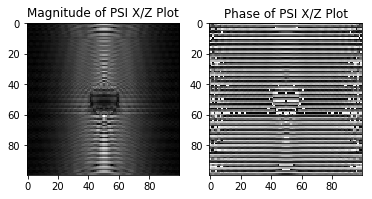

Step 49 took 0.0 s and the error: 1.0519459e-06


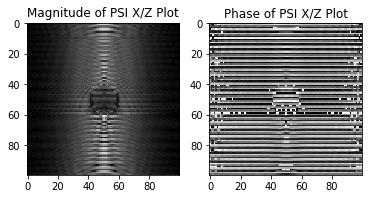

Step 50 took 0.0 s and the error: 1.3435579e-06


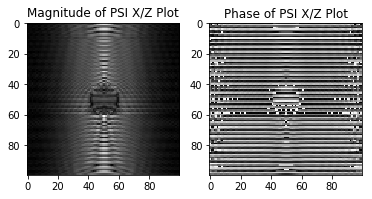

Step 51 took 0.0 s and the error: 3.4186608e-06


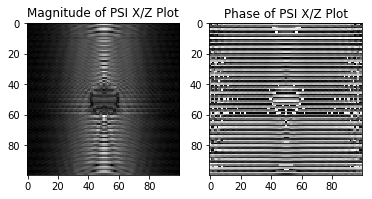

Step 52 took 0.0 s and the error: 2.78686e-06


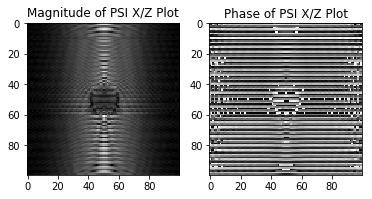

Step 53 took 0.0 s and the error: 7.840452e-07


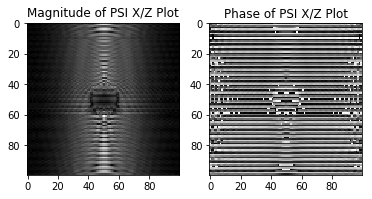

Step 54 took 0.0 s and the error: 1.0253706e-06


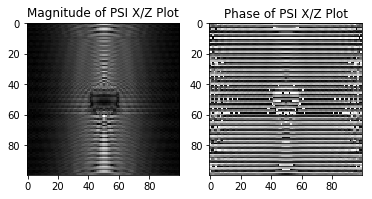

Step 55 took 0.0 s and the error: 2.3461018e-06


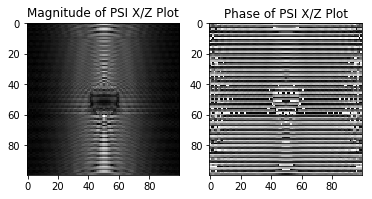

Step 56 took 0.0 s and the error: 1.8372356e-06


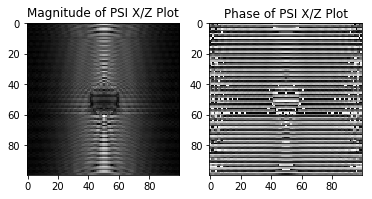

Step 57 took 0.0 s and the error: 5.461794e-07


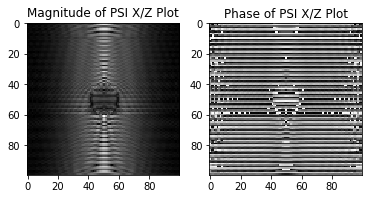

Step 58 took 0.0 s and the error: 8.2480216e-07


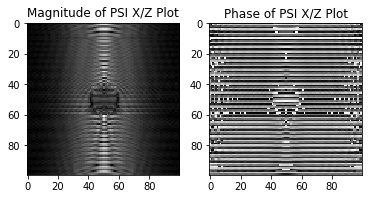

Step 59 took 0.0 s and the error: 1.6708544e-06


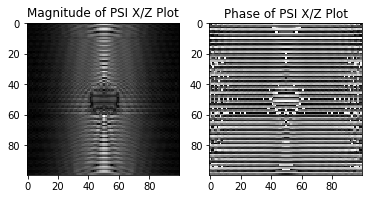

Step 60 took 0.0 s and the error: 1.1739432e-06


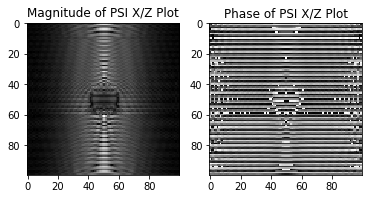

Step 61 took 0.0 s and the error: 3.5550832e-07


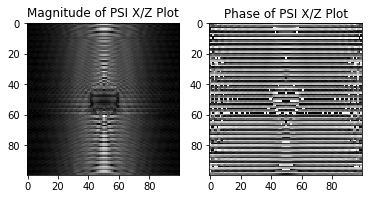

Step 62 took 0.0 s and the error: 7.202146e-07


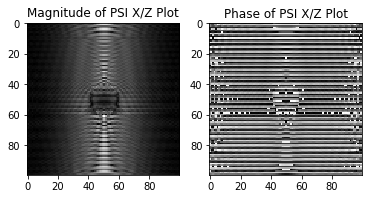

Step 63 took 0.0 s and the error: 1.2097623e-06


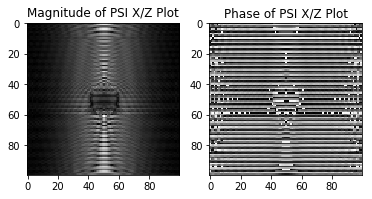

Step 64 took 0.0 s and the error: 7.000483e-07


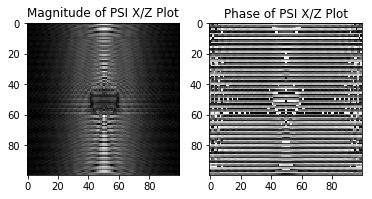

Step 65 took 0.0 s and the error: 2.612309e-07


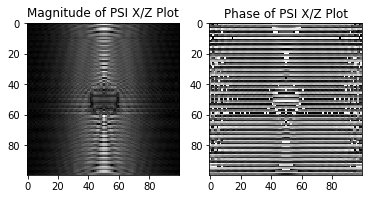

Step 66 took 0.0 s and the error: 6.6075063e-07


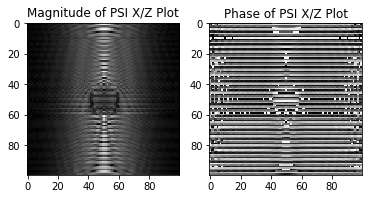

Step 67 took 0.0 s and the error: 8.518348e-07


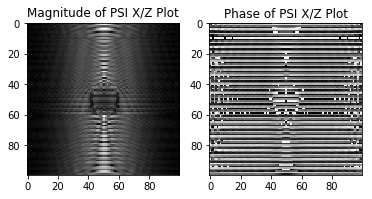

Step 68 took 0.0 s and the error: 3.8495827e-07


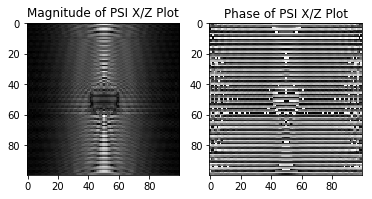

Step 69 took 0.0 s and the error: 2.4893302e-07


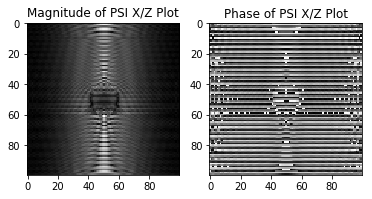

Step 70 took 0.0 s and the error: 6.009508e-07


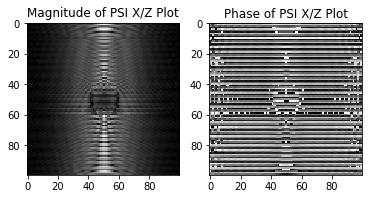

Step 71 took 0.0 s and the error: 5.524671e-07


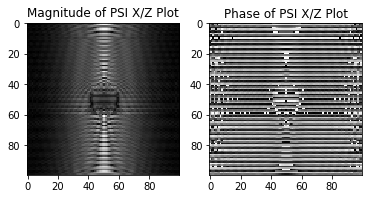

Step 72 took 0.0 s and the error: 2.0756175e-07


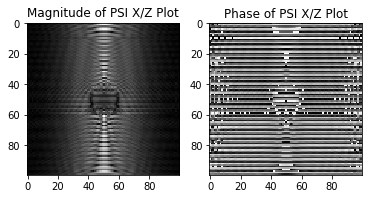

Step 73 took 0.0 s and the error: 2.9481956e-07


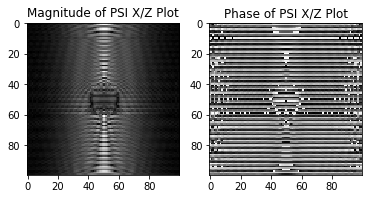

Step 74 took 0.0 s and the error: 4.99949e-07


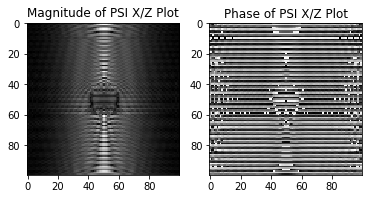

Step 75 took 0.0 s and the error: 3.1271236e-07


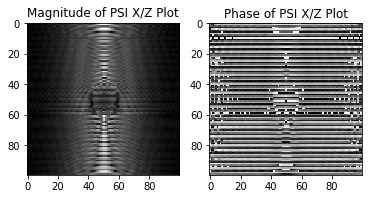

Step 76 took 0.0 s and the error: 1.6653959e-07


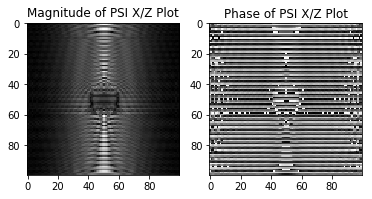

Step 77 took 0.0 s and the error: 3.2767804e-07


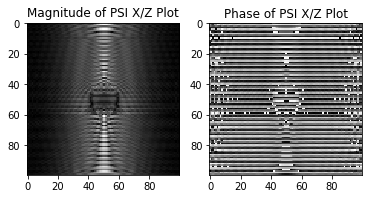

Step 78 took 0.0 s and the error: 3.5222521e-07


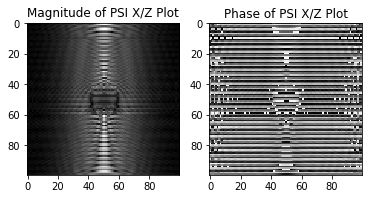

Step 79 took 0.0 s and the error: 1.8251868e-07


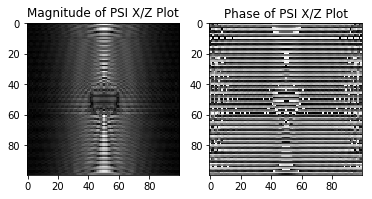

Step 80 took 0.0 s and the error: 1.9358384e-07


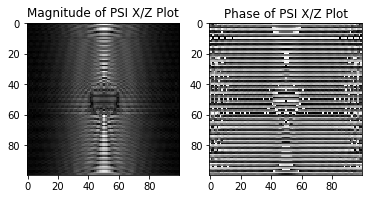

Step 81 took 0.0 s and the error: 2.9737058e-07


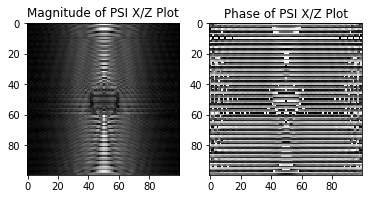

Step 82 took 0.0 s and the error: 2.2451714e-07


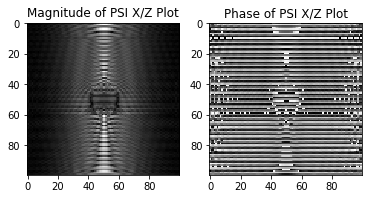

Step 83 took 0.0 s and the error: 1.4672328e-07


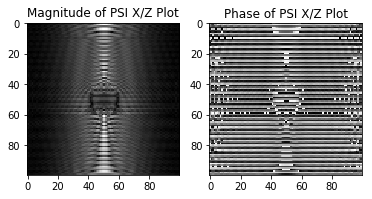

Step 84 took 0.0 s and the error: 2.1400685e-07


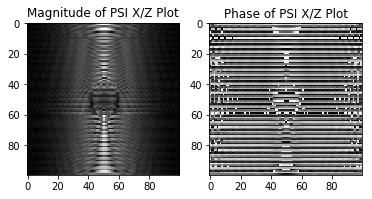

Step 85 took 0.0 s and the error: 2.2950624e-07


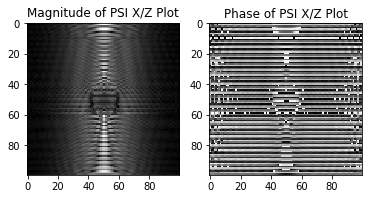

Step 86 took 0.0 s and the error: 1.523502e-07


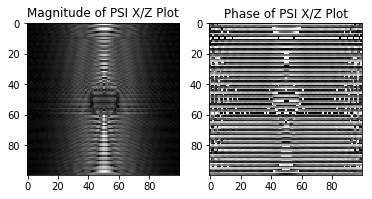

Step 87 took 0.0 s and the error: 1.5466551e-07


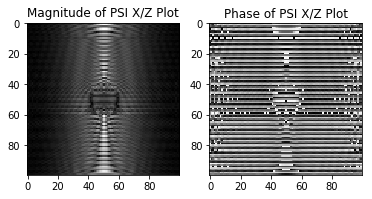

Step 88 took 0.0 s and the error: 2.0057932e-07


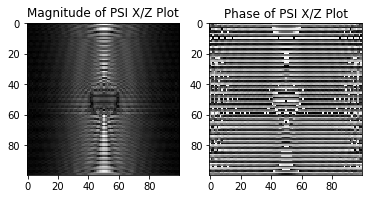

Step 89 took 0.0 s and the error: 1.655867e-07


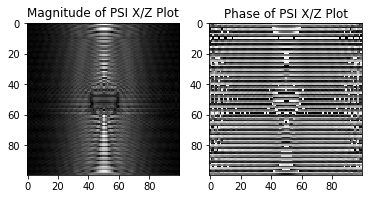

Step 90 took 0.0 s and the error: 1.3019005e-07


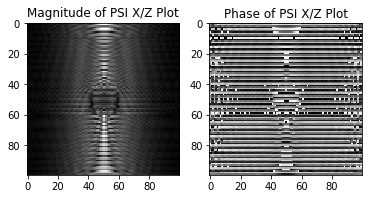

Step 91 took 0.0 s and the error: 1.6270029e-07


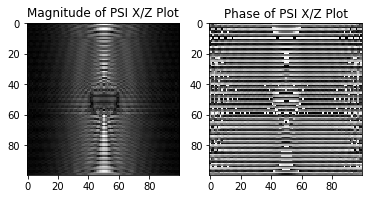

Step 92 took 0.0 s and the error: 1.6578892e-07


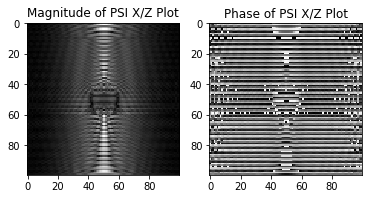

Step 93 took 0.0 s and the error: 1.2705894e-07


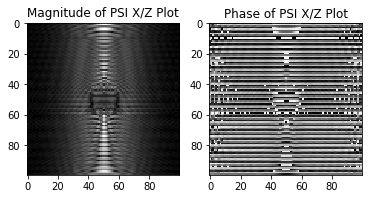

Step 94 took 0.0 s and the error: 1.3359274e-07


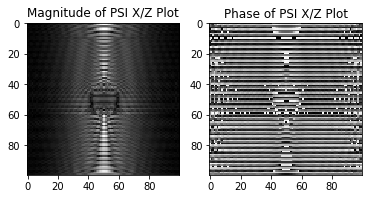

Step 95 took 0.0 s and the error: 1.5359835e-07


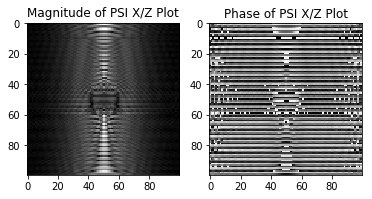

Step 96 took 0.0 s and the error: 1.293464e-07


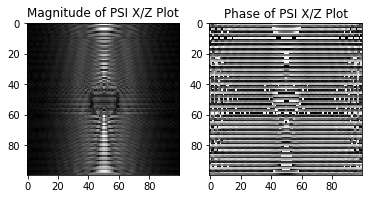

Step 97 took 0.0 s and the error: 1.1759216e-07


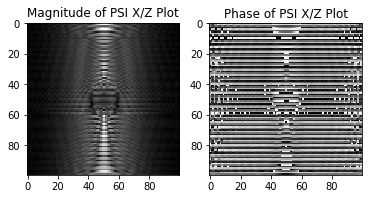

Step 98 took 0.0 s and the error: 1.3693506e-07


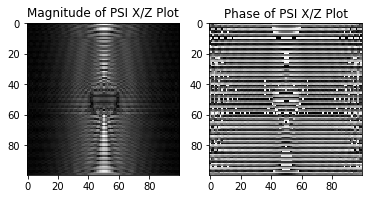

Step 99 took 0.0 s and the error: 1.2884051e-07


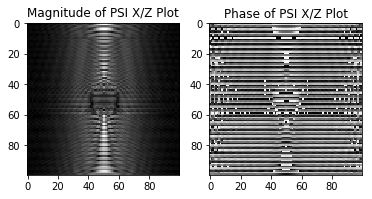

In [17]:
#%% Do n iterations to let the series converge
print('Start Computing the result')
for i in range(Niter):

    start_time = time.time()
    _, myerror = MySEAGLE.sess.run([MySEAGLE.train_op, MySEAGLE.my_error])
    print('Step '+str(i) + ' took ' +str(0*(time.time()-start_time))+' s'+ ' and the error: '+str(myerror))
    if(np.mod(i,10)==0 and is_debug):
        #%% Display result 
        plt.subplot(1,2,1), plt.title('Magnitude of PSI X/Z Plot')
        plt.imshow(np.squeeze(np.abs(MySEAGLE.tf_u.eval()[:,mymidpoint,:])), cmap='gray')#, plt.colorbar()
        plt.subplot(1,2,2), plt.title('Phase of PSI X/Z Plot')
        plt.imshow(np.squeeze(np.angle(MySEAGLE.tf_u.eval()[:,mymidpoint,:])), cmap='gray')#, plt.colorbar()
        #plt.savefig('reconstruction_{0:03}'.format(i)+'.png')
        plt.show()

# Visualize and Save results

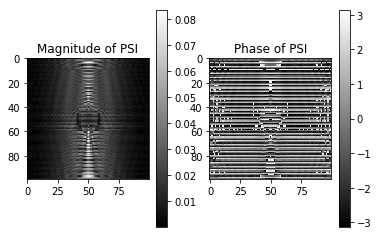

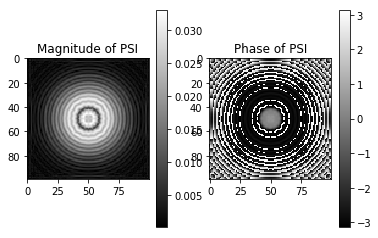

SERIOUS PROBLEM!!!! Why is the FT of Green so weird?


In [18]:
#%% Display result 
plt.subplot(1,2,1), plt.title('Magnitude of PSI')
plt.imshow(np.squeeze(np.abs(MySEAGLE.tf_u.eval()[:,:,mymidpoint ])), cmap='gray'), plt.colorbar()
plt.subplot(1,2,2), plt.title('Phase of PSI')
plt.imshow(np.squeeze(np.angle(MySEAGLE.tf_u.eval()[:,:,mymidpoint ])), cmap='gray'), plt.colorbar()
plt.show()

# Display result 
plt.subplot(1,2,1), plt.title('Magnitude of PSI')
plt.imshow(np.squeeze(np.abs(MySEAGLE.tf_u.eval()[mymidpoint,:,:])), cmap='gray'), plt.colorbar()
plt.subplot(1,2,2), plt.title('Phase of PSI')
plt.imshow(np.squeeze(np.angle(MySEAGLE.tf_u.eval()[mymidpoint,:,:])), cmap='gray'), plt.colorbar()
plt.show()
print('SERIOUS PROBLEM!!!! Why is the FT of Green so weird?')


scipy.io.savemat('exportresult.mat', mdict={'u_dash': MySEAGLE.tf_u.eval(), 
                                            'f_obj':MySEAGLE.f, 
                                            'mysrc': MySEAGLE.mySrc, 
                                            'u_in': MySEAGLE.u_in, 
                                            'greens_fkt': MySEAGLE.greens_fkt, 
                                            'greens_fkt_ft': MySEAGLE.greens_fkt_ft})

# save images
myamp_res = np.squeeze(np.abs(MySEAGLE.tf_u.eval()[mymidpoint,:,:]))
myamp_res  = np.uint8(myamp_res /np.max(myamp_res )*(2**8-1))
plt.imsave('result_abs_xy.png', myamp_res)

myphase_res = np.squeeze(np.angle(MySEAGLE.tf_u.eval()[mymidpoint,:,:]))
myphase_res = np.uint8(myphase_res/np.max(myphase_res)*(2**8-1))
plt.imsave('result_angle_xy.png', myphase_res)


myamp_res = np.squeeze(np.abs(MySEAGLE.tf_u.eval()[:,mymidpoint,:]))
myamp_res  = np.uint8(myamp_res /np.max(myamp_res )*(2**8-1))
plt.imsave('result_abs_xz.png', myamp_res)

myphase_res = np.squeeze(np.angle(MySEAGLE.tf_u.eval()[:,mymidpoint,:]))
myphase_res = np.uint8(myphase_res/np.max(myphase_res)*(2**8-1))
plt.imsave('result_angle_xz.png', myphase_res)